## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Reading Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
single_image = X_train[0]

In [5]:
single_image.shape

(28, 28)

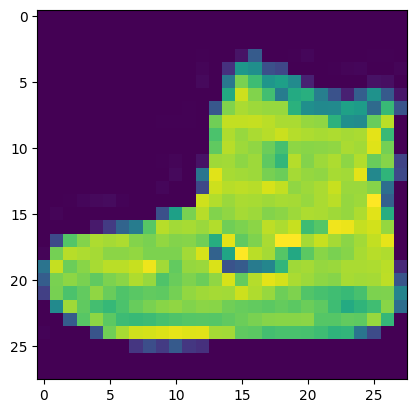

In [6]:
plt.imshow(single_image)

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Data Preprocessing

### Normalizing the Training Data

In [8]:
single_image.max()

255

In [9]:
single_image.min()

0

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
scaled_image = X_train[0]

In [12]:
scaled_image.max()

1.0

In [13]:
scaled_image.min()

0.0

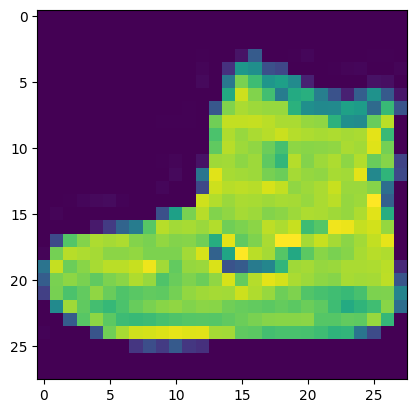

In [14]:
plt.imshow(scaled_image)

### Reshaping the Data

In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
X_test.shape

(10000, 28, 28)

In [17]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

### Converting Test Labels and Training Labels into Categorical

In [18]:
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

## Creating the Model

In [19]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128, activation="relu"))

model.add(Dense(units=10, activation="softmax"))

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [21]:
early_stopping = EarlyStopping(monitor="val_loss",patience=1)

In [22]:
model.fit(
    x=X_train,
    y=y_cat_train,
    epochs=10,
    validation_data=(X_test, y_cat_test),
    callbacks=[early_stopping]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8140 - loss: 0.5358 - val_accuracy: 0.8841 - val_loss: 0.3257
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8948 - loss: 0.2846 - val_accuracy: 0.8890 - val_loss: 0.2993
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9135 - loss: 0.2321 - val_accuracy: 0.8997 - val_loss: 0.2768
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9273 - loss: 0.1965 - val_accuracy: 0.9036 - val_loss: 0.2694
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9382 - loss: 0.1658 - val_accuracy: 0.9025 - val_loss: 0.2739


## Model Evaluation

In [23]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

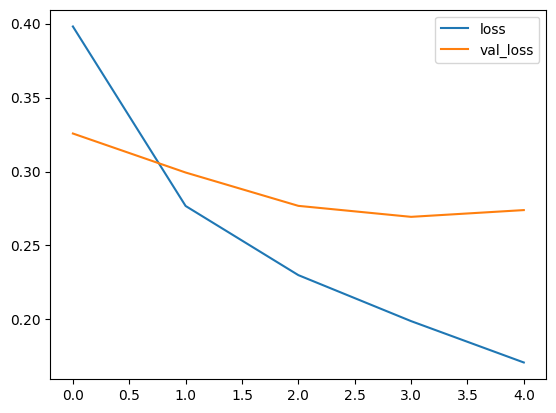

In [24]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

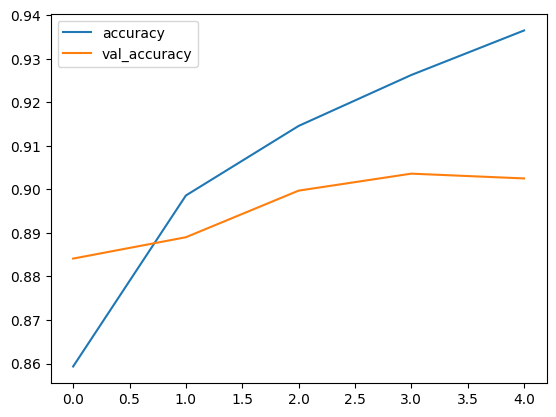

In [25]:
metrics[['accuracy', 'val_accuracy']].plot()

In [26]:
model.metrics_names

['loss', 'compile_metrics']

In [27]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.273930162191391, 0.9024999737739563]

## Predictions

In [28]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step


In [29]:
print(classification_report(y_true=y_test, y_pred=predicted_classes))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.79      0.89      0.84      1000
           3       0.91      0.92      0.92      1000
           4       0.89      0.77      0.83      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.69      0.72      1000
           7       0.93      0.99      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



<Axes: >

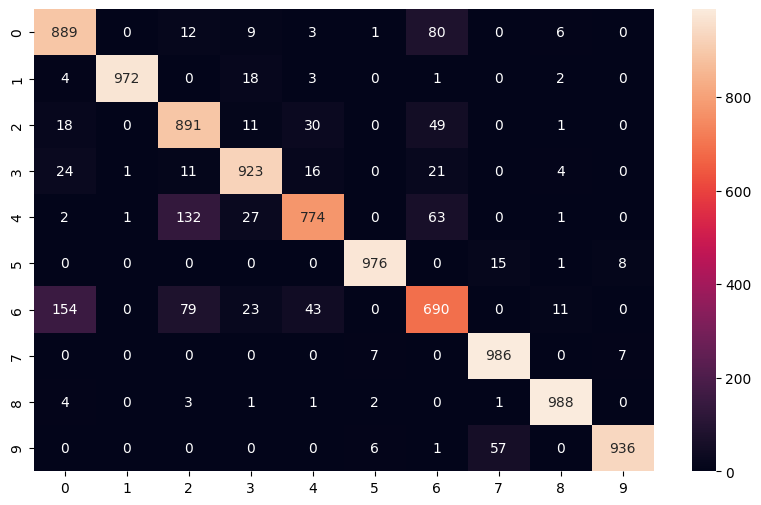

In [30]:
plt.figure(figsize=(10,6))
matrix = confusion_matrix(y_true=y_test, y_pred=predicted_classes)
sns.heatmap(matrix, annot=True, fmt='1.0f')

## Predicting a Single Image

Labels
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

In [31]:
my_image = X_test[0]

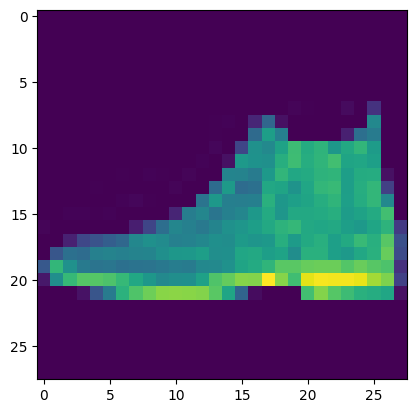

In [32]:
plt.imshow(my_image.reshape(28,28))

In [33]:
single_image_prediction = model.predict(my_image.reshape(1, 28, 28, 1))
predicted_class = np.argmax(single_image_prediction, axis=1)
predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([9], dtype=int64)

In [34]:
y_test[0]

9